In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,train_test_split
import matplotlib.pyplot as plt


In [21]:
# 读取数据
data = pd.read_csv(r'D:\ArcgisData\pred_organic_p_n\feature_table\feature_table_result\all_result.csv')
print(len(data))
# 删除有缺失值的行
data.dropna(inplace=True)
len(data),data.columns


6808


(6806,
 Index(['Unnamed: 0', 'GDPOINTNPSOM', 'Ph', 'N', 'P', 'SOM', 'TWI5', 'TPI201',
        'TPI101', 'TPI11', 'TPI3', 'TMP', 'SOILQS', 'SLOP', 'PRE', 'NIGTH',
        'NDVI', 'DEM', 'CUR', 'ASP', 'PLCUR', 'POCUR', 'OSJL', 'LAT', 'LON',
        'DZ', 'DL'],
       dtype='object'))

In [22]:
data.drop(['Unnamed: 0','GDPOINTNPSOM','P','SOM','N'], axis=1, inplace=True)
data.columns

Index(['Ph', 'TWI5', 'TPI201', 'TPI101', 'TPI11', 'TPI3', 'TMP', 'SOILQS',
       'SLOP', 'PRE', 'NIGTH', 'NDVI', 'DEM', 'CUR', 'ASP', 'PLCUR', 'POCUR',
       'OSJL', 'LAT', 'LON', 'DZ', 'DL'],
      dtype='object')

In [23]:
data['DL'] = data['DL'].astype(str)
data['DZ'] = data['DZ'].astype(str)
data.dtypes

Ph        float64
TWI5      float64
TPI201    float64
TPI101    float64
TPI11     float64
TPI3      float64
TMP       float64
SOILQS      int64
SLOP      float64
PRE       float64
NIGTH     float64
NDVI      float64
DEM       float64
CUR       float64
ASP       float64
PLCUR     float64
POCUR     float64
OSJL      float64
LAT       float64
LON       float64
DZ         object
DL         object
dtype: object

In [24]:
data

,Ph,TWI5,TPI201,TPI101,TPI11,TPI3,TMP,SOILQS,SLOP,PRE,...,DEM,CUR,ASP,PLCUR,POCUR,OSJL,LAT,LON,DZ,DL
0,5.32,5.962960,15.477661,10.274841,0.157227,0.025696,159.41667,12,23.468807,811.3333,...,885.1,4.000000,277.943970,-0.644262,-4.644262,66.708320,2738470.0,541870.0,2,3
1,5.85,8.513925,20.920898,-20.338257,-4.790527,-0.400513,138.66667,11,34.398080,846.7500,...,1270.5,4.000000,71.036064,-3.452797,-7.452796,247.487380,3045130.0,417910.0,2,3
2,6.97,6.150497,-70.393555,-31.960815,-1.263062,-0.061768,138.66667,11,19.115973,846.7500,...,1162.7,-4.000977,63.435400,-1.600421,2.400555,5.000000,3046240.0,419590.0,2,3
3,8.24,5.421333,-12.195618,-14.295593,0.508789,0.033875,148.75000,12,22.632359,834.3333,...,1013.6,2.799561,84.494600,-0.051160,-2.850720,14.142136,3040240.0,423340.0,2,3
4,6.72,6.967052,57.751343,22.754883,-0.085693,0.006958,152.50000,11,13.832514,831.3333,...,1084.0,-0.800293,150.833390,0.417779,1.218072,155.724120,3038980.0,420880.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,7.83,10.252124,-43.540405,-10.025513,0.031860,0.003784,157.33333,11,2.753100,808.3333,...,934.3,-1.600098,297.898600,-0.720061,0.880037,85.000000,2713990.0,454780.0,1,7
6803,5.53,7.875397,-32.677430,-13.003418,-0.095154,-0.006409,157.83333,11,1.417734,807.6667,...,940.1,-0.000488,45.000000,0.099792,0.100281,106.066020,2711890.0,454120.0,1,7
6804,5.74,6.314113,-31.092773,-6.552490,-0.225037,-0.023010,157.33333,11,12.604443,808.3333,...,965.0,-0.000000,280.304630,-0.748855,-0.748855,70.000000,2711650.0,455350.0,1,3
6806,7.43,6.215333,-59.951660,-15.557617,0.005493,-0.001587,139.00000,12,3.646765,879.4167,...,1100.8,-0.399414,191.307790,-0.356667,0.042747,264.196900,2970250.0,723100.0,8,3


In [25]:
# 划分数据

X = data.drop(columns='Ph')

y = data['Ph']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X,y

(           TWI5     TPI201     TPI101     TPI11      TPI3        TMP  SOILQS  \
 0      5.962960  15.477661  10.274841  0.157227  0.025696  159.41667      12   
 1      8.513925  20.920898 -20.338257 -4.790527 -0.400513  138.66667      11   
 2      6.150497 -70.393555 -31.960815 -1.263062 -0.061768  138.66667      11   
 3      5.421333 -12.195618 -14.295593  0.508789  0.033875  148.75000      12   
 4      6.967052  57.751343  22.754883 -0.085693  0.006958  152.50000      11   
 ...         ...        ...        ...       ...       ...        ...     ...   
 6802  10.252124 -43.540405 -10.025513  0.031860  0.003784  157.33333      11   
 6803   7.875397 -32.677430 -13.003418 -0.095154 -0.006409  157.83333      11   
 6804   6.314113 -31.092773  -6.552490 -0.225037 -0.023010  157.33333      11   
 6806   6.215333 -59.951660 -15.557617  0.005493 -0.001587  139.00000      12   
 6807   6.814139 -41.503662 -17.830322 -0.891479 -0.071899  131.33333      12   
 
            SLOP       PRE

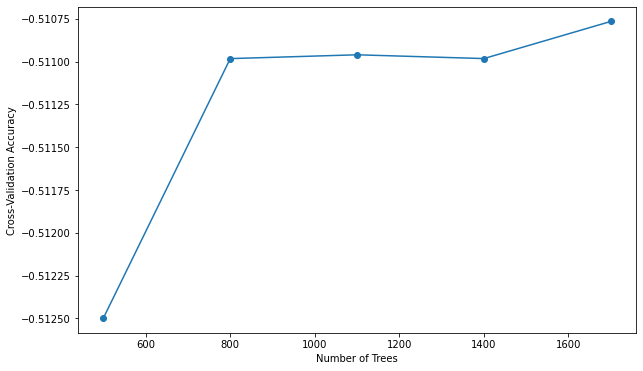

The optimal number of trees is 1700


In [16]:
# 设置树的数目范围
n_estimators_range = range(500, 2000, 300)
cv_scores = []

# 使用交叉验证
for n_estimators in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    #scores = cross_val_score(rf, X, y, cv=5, scoring='r2')  # 5折交叉验证
    scores = cross_val_score(rf,X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # 5折交叉验证
    cv_scores.append(scores.mean())

# 绘制交叉验证得分图
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation Accuracy')
# plt.savefig('target.png') # 保存图片
plt.show()

# 选择最优数量的树
optimal_n_estimators = n_estimators_range[cv_scores.index(max(cv_scores))]
print("The optimal number of trees is {}".format(optimal_n_estimators))

In [26]:
# 初始化和训练随机森林模型
rf = RandomForestRegressor(n_estimators=1700, random_state=42)
rf.fit(X_train,y_train)
# 在训练集上预测

train_preds = rf.predict(X_train)

# 计算训练集的RMSE,r2

train_rmse = mean_squared_error(y_train, train_preds, squared=False)

train_r2 = r2_score(y_train,train_preds)
print(f'Train RMSE: {train_rmse:.4f},Train R2: {train_r2:.4f}')

Train RMSE: 0.2647,Train R2: 0.9217


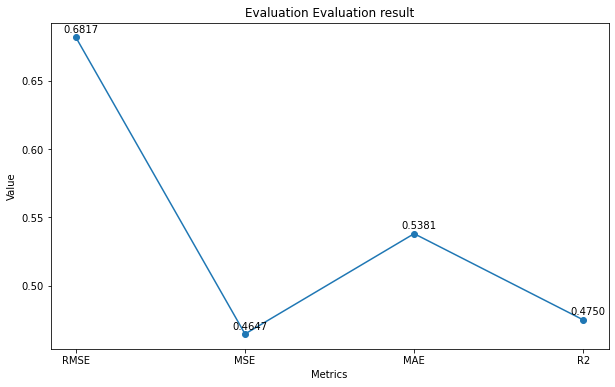

In [18]:
# 计算测试集的RMSE,r2
test_preds = rf.predict(X_test)
test_rmse = mean_squared_error(y_test,test_preds,squared=False)
test_mse = mean_squared_error(y_test,test_preds)
test_mae = mean_absolute_error(y_test,test_preds)
test_r2 = r2_score(y_test,test_preds)

labels = ['RMSE','MSE','MAE','R2']
values = [test_rmse,test_mse,test_mae,test_r2]
plt.figure(figsize=(10,6))
plt.plot(labels, values, marker='o')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Evaluation result')
# 在每个点上添加文本标签
for i in range(len(labels)):
    plt.annotate(f'{values[i]:.4f}', xy=(labels[i], values[i]), xytext=(5, 5), textcoords='offset points', ha='center')

plt.show()
plt.show()


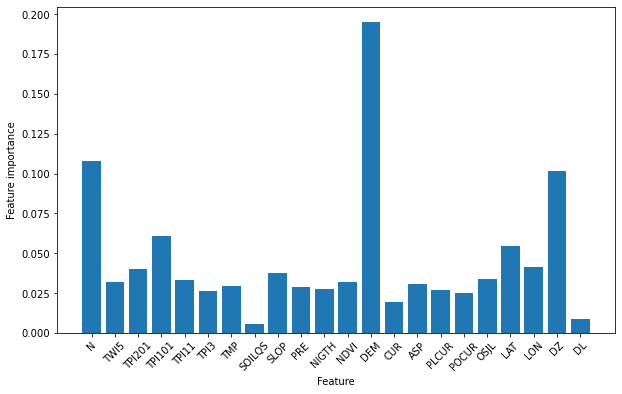

In [14]:
import matplotlib.pyplot as plt
importance = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
plt.bar(range(len(features)), importance, align='center')
plt.xticks(np.arange(len(features)), features, rotation = 45)
plt.ylabel("Feature importance")
plt.xlabel("Feature")
plt.show()

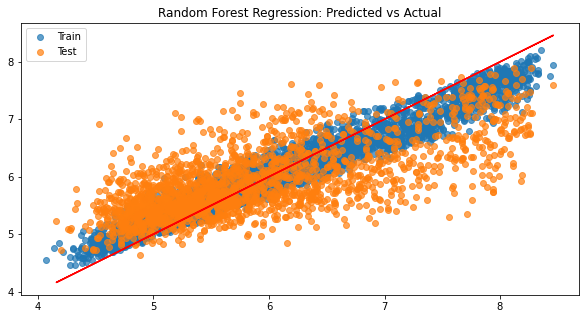

In [15]:
# 在训练集和测试集上的预测值

train_preds = rf.predict(X_train)

test_preds = rf.predict(X_test)



plt.figure(figsize=(10,5))



# 画出训练集的散点图

plt.scatter(y_train, train_preds, label='Train', alpha=.7)

# 画出测试集的散点图

plt.scatter(y_test, test_preds, label='Test', alpha=.7)

# 画出y=x线
plt.plot(y_test, y_test, color='red')



plt.legend()

plt.title('Random Forest Regression: Predicted vs Actual')

plt.show()